# This is the notebook to validate information from the database system and the dicom datasets:
    1. Validate and report the consistency of information from the databased where the dota is downloaded (IDB) and the information extracted from the dicom headers (IDCM);
    2. Subject reports and filtering;
    3. create participant.csv
    4. Imaging session filtering.

In [3]:
from pathlib import Path
import nipype.interfaces.io as nio
import pandas as pd

#PATH
main_dir = Path("/scratch/mr_proc")
out_dir = Path("/output")
data_dir = main_dir / 'tab_data' 

#ppmi_dcm_file = data_dir / 'ppmi_dicomInfo.tsv'           # Inormation from dicom headers.
ppmi_dl_file  = data_dir / 'PPMI_3T_sdMRI_3_07_2022.csv'  # Inormation from download database.

# Read table
#ppmi_dcm_data = pd.read_csv(ppmi_dcm_file, sep='\t')
ppmi_dl_data  = pd.read_csv(ppmi_dl_file, sep=',')
ppmi_col_sel = ['Image Data ID', 'Subject', 'Group', 'Sex', 'Age', 'Visit', 'Modality', 'Description']
ppmi_dl_data = ppmi_dl_data.loc[:, ppmi_col_sel].copy()

FileNotFoundError: [Errno 2] No such file or directory: '/scratch/mr_proc/tab_data/PPMI_3T_sdMRI_3_07_2022.csv'

In [ ]:
# create the participants.csv from the data downloading tabel
ppmi_participant_csv_file  = data_dir / 'participants.csv'  # Inormation from download database.
participant_cols=['participant_id', 'age', 'sex', 'group']
participant_df=pd.DataFrame()
participant_df[participant_cols] = ppmi_dl_data[['Subject','Age','Sex', 'Group']]
participant_df=participant_df.drop_duplicates(subset='participant_id', keep='first')
participant_df.to_csv(ppmi_participant_csv_file, index=False)

In [2]:
print(ppmi_dl_data.columns)
ppmi_col_list=['Image Data ID', 'Subject', 'Group', 'Sex', 'Age', 'Visit', 'Modality', 'Description', 'Type', 'Acq Date', 'Format', 'Downloaded']

ppmi_dl_columns_list  = ['Subject','Image Data ID','Modality','Sex','Age', 'Visit','Description']
ppmi_dcm_columns_list = ['patient_id','dcm_dir_name','date','series_id', 'sequence_name','series_description', 'protocol_name','dim1','dim2','dim3','dim4']

def report_sum(df, _list, dataset_name):
    for x in _list:
        print("Total "+x+' of '+ dataset_name+" is : ")
        _len = len(df.loc[:,x].unique());
        display(_len)
        if _len <= 10:
            display(df.loc[:,x].unique())

# check download meta data and dcm information
report_list = ['Subject', 'Modality','Sex','Age', 'Visit',];
report_sum(ppmi_dl_data, report_list, 'PPMI')

Index(['Image Data ID', 'Subject', 'Group', 'Sex', 'Age', 'Visit', 'Modality',
       'Description'],
      dtype='object')
Total Subject of PPMI is : 


585

Total Modality of PPMI is : 


2

array(['MRI', 'DTI'], dtype=object)

Total Sex of PPMI is : 


3

array(['M', 'F', 'X'], dtype=object)

Total Age of PPMI is : 


52

Total Visit of PPMI is : 


10

array([ 7,  1,  5, 11, 90, 30,  9,  0, 21, 91])

Visit counts: 2    46
1    23
3    19
4     3
Name: Visit, dtype: int64
{Control}    91
Name: Group, dtype: int64


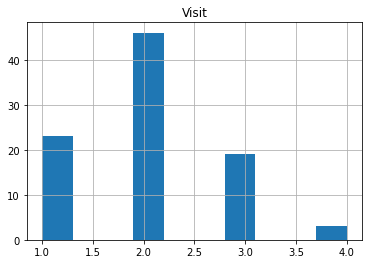

In [47]:
#data selection
tmp_data = ppmi_dl_data[ppmi_dl_data['Group']=='Control'].copy()

grouped=tmp_data.groupby(by='Subject').agg(lambda x: len(set(x)))
grouped.hist(column=['Visit'])
print('Visit counts:', grouped.Visit.value_counts())
print(tmp_data.groupby(by='Subject').agg(lambda x: set(x)).Group.value_counts())

Visit counts: 1    253
2    119
4    109
3    103
5      1
Name: Visit, dtype: int64
{PD}              304
{Prodromal}       145
{Control}          91
{SWEDD}            42
{Phantom}           2
{GenReg Unaff}      1
Name: Group, dtype: int64


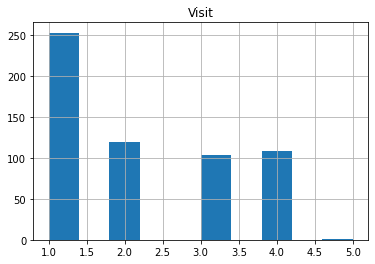

In [44]:
grouped=ppmi_dl_data.groupby(by='Subject').agg(lambda x: len(set(x)))
grouped.hist(column=['Visit'])
print('Visit counts:', grouped.Visit.value_counts())
print(ppmi_dl_data.groupby(by='Subject').agg(lambda x: set(x)).Group.value_counts())

In [26]:
ppmi_dl_data.groupby(by='Subject').agg(lambda x: list(x))

,Image Data ID,Group,Sex,Age,Visit,Modality,Description
Subject,,,,,,,
01218AUG16,"[I787959, I787960]","[Phantom, Phantom]","[X, X]","[56, 56]","[0, 0]","[MRI, DTI]","[MPRAGE Phantom GRAPPA2, DTI]"
08827APR11,"[I253669, I253662, I253664, I253666, I253668, ...","[Phantom, Phantom, Phantom, Phantom, Phantom, ...","[M, M, M, M, M, M, M, M]","[39, 39, 39, 39, 39, 39, 39, 39]","[1, 1, 1, 1, 1, 1, 1, 1]","[MRI, MRI, MRI, DTI, DTI, DTI, DTI, DTI]","[localizer, localizer, localizer, DTI_FA, DTI_..."
100005,"[I1526367, I1526369, I1526362, I1526371, I1526...","[PD, PD, PD, PD, PD, PD, PD, PD, PD, PD, PD, PD]","[M, M, M, M, M, M, M, M, M, M, M, M]","[53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[DTI, DTI, MRI, DTI, MRI, MRI, DTI, MRI, DTI, ...","[DTI_FA, DTI, 2D GRE-MT, DTI_30dir R-L, 2D GRE..."
100006,"[I1526387, I1526380, I1526382, I1526384, I1526...","[PD, PD, PD, PD, PD, PD, PD, PD, PD, PD, PD, P...","[F, F, F, F, F, F, F, F, F, F, F, F, F, F, F, F]","[56, 56, 56, 56, 56, 57, 56, 57, 56, 56, 56, 5...","[1, 1, 1, 1, 1, 5, 1, 5, 1, 1, 1, 1, 5, 1, 5, 1]","[DTI, MRI, MRI, DTI, MRI, MRI, DTI, DTI, MRI, ...","[DTI_30dir R-L, 2D GRE-MT, 2D GRE-MT, DTI_ADC,..."
100007,"[I1525728, I1525730, I1537555, I1525732, I1525...","[PD, PD, PD, PD, PD, PD, PD, PD, PD]","[M, M, M, M, M, M, M, M, M]","[67, 67, 68, 67, 67, 67, 67, 68, 67]","[1, 1, 5, 1, 1, 1, 1, 5, 1]","[MRI, MRI, MRI, MRI, DTI, MRI, MRI, MRI, MRI]","[3D T2 FLAIR, 2D GRE-MT, 3D T2 FLAIR, 2D GRE-M..."
...,...,...,...,...,...,...,...
75512,"[I1199323, I1199326, I1199321, I1199324, I1199...","[Prodromal, Prodromal, Prodromal, Prodromal, P...","[F, F, F, F, F]","[51, 51, 51, 51, 51]","[1, 1, 1, 1, 1]","[MRI, DTI, MRI, MRI, DTI]","[MPRAGE_GRAPPA_ADNI, DTI_gated, AXIAL PD-T2 TS..."
75525,"[I1526084, I1526075, I1526079, I1526081, I1526...","[Prodromal, Prodromal, Prodromal, Prodromal, P...","[F, F, F, F, F, F, F, F, F]","[73, 73, 73, 73, 73, 73, 73, 73, 73]","[7, 7, 7, 7, 7, 7, 7, 7, 7]","[DTI, MRI, MRI, MRI, MRI, DTI, MRI, MRI, MRI]","[DTI_RL, 3D T2 FLAIR, 2D GRE-MT, 2D GRE-MT, 2D..."
75564,"[I1362245, I1362247, I1362244, I1362246, I1362...","[Prodromal, Prodromal, Prodromal, Prodromal, P...","[F, F, F, F, F]","[76, 76, 76, 76, 76]","[1, 1, 1, 1, 1]","[MRI, DTI, MRI, DTI, MRI]","[MPRAGE GRAPPA, DTI_gated, MPRAGE ADNI, DTI_ga..."


In [15]:
What do I want from this script

In [3]:
# Verify with downloaded dicom folders (protocol name and date included) due to missing information from dicom headers
adni_folder_data=pd.read_csv(adni_dcm_folder_file, sep='\t',skip_blank_lines=1)
adni_folder_data=adni_folder_data.dropna()
adni_folder_data=adni_folder_data.iloc[:,1:]
adni_folder_data=adni_folder_data.rename(columns={"Unnamed: 1": "patient_id", "Unnamed: 2":"series_description", 'Unnamed: 3':"date", "Unnamed: 4":"dcm_dir_name"})
adni_folder_data=adni_folder_data.reset_index()
#adni_folder_data.head()

# confirmation from 
df_tmp=adni_folder_data[(adni_folder_data['series_description'].str.contains('RAGE', regex=False))]# | \
                       # (adni_folder_data['series_description'].str.contains('SPGR', regex=False))]
#adni_dcm_data['dim3'].unique()
display(len(df_tmp['patient_id'].unique()))
display(len(adni_folder_data['patient_id'].unique()))

#adni_full_data[adni_full_data['dim3']>600].tail(5)
tmp_col1=df_tmp.groupby(['patient_id'])
A = tmp_col1['date'].transform(max)
df_tmp.loc[:,'last_session_time']=list(A)
#B
df_tmp = df_tmp[df_tmp['date']==df_tmp['last_session_time']]
#df_tmp['i_id']=df_tmp.index
#display(len(df_tmp))
df_tmp.sort_values(by='patient_id')
gX=df_tmp.groupby('patient_id')
g1X=gX['dcm_dir_name'].apply(lambda x: max(x))
display(g1X)
#g1.to_csv(adni_session_file,header=0)
len(g1X)

238

312

/usr/local/miniconda/lib/python3.8/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/usr/local/miniconda/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


patient_id
002_S_0295    S150056
002_S_0413    S322084
002_S_0685    S160107
002_S_1261    S262111
002_S_1280    S258723
               ...   
941_S_4100    S418036
941_S_4255    S205784
941_S_4292    S489268
941_S_4365    S437582
941_S_4376    S437616
Name: dcm_dir_name, Length: 238, dtype: object

238

In [4]:
#adni_dicom_counter_df=adni_folder_data[(adni_folder_data['series_description'].str.contains('MPRAGE', regex=False))]# | \
                       # (adni_folder_data['series_description'].str.contains('SPGR', regex=False))]
adni_dicom_counter_df=adni_folder_data[adni_folder_data['series_description']=='MPRAGE']# | \
adni_dl_counter_df= adni_dl_data[adni_dl_data['Description']=='MPRAGE']# | \
#adni_dl_counter_df= adni_dl_data[(adni_dl_data['Description'].str.contains('MPRAGE', regex=False))]# | \
                       # (adni_folder_data['series_description'].str.contains('SPGR', regex=False))]
display('MPRAGE: ADNI dicom: ',len(adni_dicom_counter_df['patient_id'].unique()))
display('ADNI download tab: ', len(adni_dl_counter_df['Subject'].unique()))

adni_dicom_counter_df=adni_folder_data[(adni_folder_data['series_description'].str.contains('RAGE', regex=False)) | \
                                       (adni_folder_data['series_description'].str.contains('SPGR', regex=False))]
adni_dl_counter_df= adni_dl_data[(adni_dl_data['Description'].str.contains('RAGE', regex=False)) | \
                                 (adni_dl_data['Description'].str.contains('SPGR', regex=False))]
display('*RAGE+*SPGR: ADNI dicom: ',len(adni_dicom_counter_df['patient_id'].unique()))
display(r'ADNI download tab: ', len(adni_dl_counter_df['Subject'].unique()))


'*RAGE: ADNI dicom: '

203

'ADNI download tab: '

203

'*RAGE+*SPGR: ADNI dicom: '

312

'ADNI download tab: '

312

In [18]:
# session information directly from dicom headers
df_tmp1=adni_dcm_data[#(adni_dcm_data['dim1']>190) & (adni_dcm_data['dim1']<300) & \
                     #(adni_dcm_data['dim2']>190) & (adni_dcm_data['dim2']<300) & \
                     #(adni_dcm_data['dim3']>100) & #(adni_dcm_data['dim3']<500) & \
                     ((adni_dcm_data['series_description'].str.contains('RAGE', regex=False)) | \
                      (adni_dcm_data['series_description'].str.contains('SPGR', regex=False)))]
#display(df_tmp)
#adni_dcm_data['dim3'].unique()
display(len(df_tmp1['patient_id'].unique()))
display(len(adni_dcm_data['patient_id'].unique()))
#display(tmp_col)
#adni_full_data[adni_full_data['dim3']>600].tail(5)
tmp_col1=df_tmp1.groupby(['patient_id'])
B = tmp_col1['date'].transform(max)
df_tmp1.loc[:,'last_session_time']=list(B)
#B
df_tmp1 = df_tmp1[df_tmp1['date']==df_tmp1['last_session_time']]
#df_tmp['i_id']=df_tmp.index
#display(len(df_tmp))
df_tmp1.sort_values(by='patient_id')
g2=df_tmp1.groupby('patient_id')
g3=g2['dcm_dir_name'].apply(lambda x: max(x))
display(g3)
#g3.to_csv(adni_session_file,header=0)
#len(g3)
#list(g3)
#adni_dcm_data[adni_dcm_data[] in list(g1)]

300

300

patient_id
002_S_0295    S110477
002_S_0413    S150697
002_S_0685    S114048
002_S_1261    S141746
002_S_1280    S183174
               ...   
941_S_4100    S418036
941_S_4255    S124668
941_S_4292    S489258
941_S_4365    S437573
941_S_4376    S437610
Name: dcm_dir_name, Length: 300, dtype: object

In [23]:
# save session names for further fMRIPrep use
def session2file(df, file_name, folder_name):
    df.to_csv(file_name, header=0)
    display(df.index)
    for x in df.index:
        f_path = out_dir / 'ADNI_sessions'  / x
        f = open(f_path, "w")
        f.write(df.loc[x])
        f.close()

adni_session_file = out_dir / 'ADNI_session.ses' # output: session we are going to process
session2file(g1X, adni_session_file, out_dir / 'ADNI_sessions' ) # g1X g3


Index(['002_S_0295', '002_S_0413', '002_S_0685', '002_S_1261', '002_S_1280',
       '002_S_4213', '002_S_4225', '002_S_4262', '002_S_4264', '002_S_4270',
       ...
       '153_S_4372', '941_S_1195', '941_S_1202', '941_S_1203', '941_S_4066',
       '941_S_4100', '941_S_4255', '941_S_4292', '941_S_4365', '941_S_4376'],
      dtype='object', name='patient_id', length=312)

In [20]:
# check all heuristic logic with sequence names from dicom header
#sequence_names = adni_dcm_data['series_description'].unique()
#for x in sequence_names:
#    if 'SPGR' in x:
#        print(x)
# check all 'MPRAGE' sequences
#sequence=adni_dcm_data['series_description'].unique()
#for x in sequence:
#    if 'MPRAGE' in x:
#        print(x)
# maybe better filter with this 
sequence_names = adni_dcm_data['series_description'].unique()
for x in sequence_names:
    if not (('SPGR' in x) or ('RAGE' in x)):
        print(x)

3 Plane Localizer
B-LOC
localizer
LOC
*SCOUT
localizer(VIT E R TEMPLE)
Localizer
localizer =
3 PLANE
Calibration Scan
B1-calibration Head
B1-calibration Body
B1-Calibration Body
B1-Calibration PA
SAG B1 CALIBRATION HEAD
Field Mapping
3-plane localizer
LOCALIZER
Cal 8HRBRAIN
SAG B1 CALIBRATION BODY
ADNI_gre_field_mapping
3 Plane Loc
SURVEY
3Plane Loc SSFSE
ASSET CALIBRATION
3-pl T2* FGRE
ADNI SH    SURVEY
Field Mapping_R/L
Average DC
T1 SAG
Field Mapping repeat
Cal Head+Neck 40
calibration scan
Field_mapping
3 PLANE LOCALIZER
B-LOC_S1_ND
SURV_NOPATCH_DEFSCALEPAR
B1-Calibration
LOCALIZER 3T
3-PL LOC
Cal Head 24
Survey
repeat SAG B1 CALIBRATION BODY


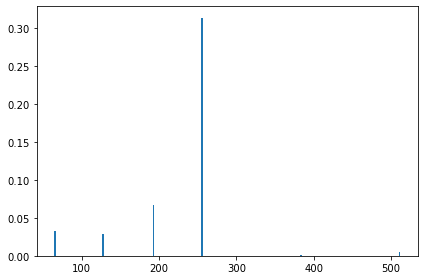

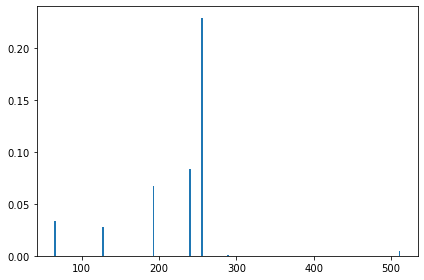

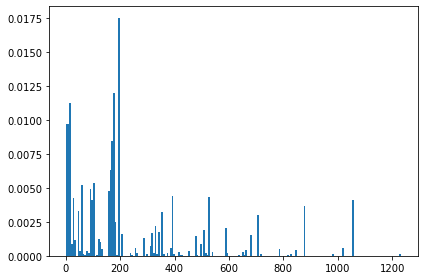

In [17]:
# check the image dimenion distribution
#display(ppmi_dl_data.sort_values(by='Subject', ascending=False).head())
#display(ppmi_dcm_data.sort_values(by='patient_id', ascending=False).head())
import seaborn as sns
import matplotlib.pyplot as plt

# the histogram of the data
fig, ax = plt.subplots()
n, bins, patches = ax.hist(adni_dcm_data['dim1'], 200, density=True)
# add a 'best fit' line
# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()
fig, ax = plt.subplots()
n, bins, patches = ax.hist(adni_dcm_data['dim2'], 200, density=True)
# add a 'best fit' line
# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()
fig, ax = plt.subplots()
n, bins, patches = ax.hist(adni_dcm_data['dim3'], 200, density=True)
# add a 'best fit' line
# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

#sns.set_theme(style="darkgrid")
#sns.displot(
#    adni_dcm_data, x="dim3", row="series_description",
#    binwidth=3, height=3, facet_kws=dict(margin_titles=True),)